# Graph Theoretical Analysis of data collected during Contextual Fear Conditioning (CFC) experiment on DRD87

In [1]:
# Bring packages onto the same path as this notebook
import os
import sys
sys.path.append(os.path.abspath(os.path.join("..", "..")))

import pandas as pd
import networkx as nx
import numpy as np
from analysis.sig_proc import Deconvoluter
from analysis.graph_analysis_utils import NeuronNetwork
from analysis.analysis_utils import FeatureExtractor
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Process the neuron signal data for DRD87 neurons on day 1

In [3]:
drd87_day1_raw = pd.read_csv(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_encode_Raw.csv"), header=None)
deconvoluter = Deconvoluter(drd87_day1_raw)

# Reindex the neuron column vectors from 0, 1, 2, ..., n --> 1, 2, 3, ..., n, n+1
deconvoluter.cell_transients.columns = [col+1 for col in deconvoluter.cell_transients.columns]
deconvoluter.cell_auc_df.columns = [col+1 for col in deconvoluter.cell_auc_df.columns]

drd87_day1 = FeatureExtractor(cell_transients_df=deconvoluter.cell_transients, auc_df=deconvoluter.cell_auc_df)

# We drop the first 600 frames (since FPS=20), and the first 30 seconds are not fit for analysis.
drd87_day1.cell_transients_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day1.auc_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day1.cell_transients_df.reset_index(drop=True, inplace=True)
drd87_day1.auc_df.reset_index(drop=True, inplace=True)

# Convert auc dataframe to boolean matrix, where spikes is a 1 and no spike is a 0
drd87_day1.auc_df = drd87_day1.auc_df.where(drd87_day1.auc_df == 0, 1)

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:46: Warning:

A behavior dataframe was not provided.



### Process the neuron signal data for DRD87 neurons on day 2

In [4]:
drd87_day2_raw = pd.read_csv(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_CSplus_Raw.csv"), header=None)
deconvoluter = Deconvoluter(drd87_day2_raw)

# Reindex the neuron column vectors from 0, 1, 2, ..., n --> 1, 2, 3, ..., n, n+1
deconvoluter.cell_transients.columns = [col+1 for col in deconvoluter.cell_transients.columns]
deconvoluter.cell_auc_df.columns = [col+1 for col in deconvoluter.cell_auc_df.columns]

drd87_day2 = FeatureExtractor(cell_transients_df=deconvoluter.cell_transients, auc_df=deconvoluter.cell_auc_df)

# We drop the first 600 frames (since FPS=20), and the first 30 seconds are not fit for analysis.
drd87_day2.cell_transients_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day2.auc_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day2.cell_transients_df.reset_index(drop=True, inplace=True)
drd87_day2.auc_df.reset_index(drop=True, inplace=True)

# Convert auc dataframe to boolean matrix, where spikes is a 1 and no spike is a 0
drd87_day2.auc_df = drd87_day2.auc_df.where(drd87_day2.auc_df == 0, 1)

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:46: Warning:

A behavior dataframe was not provided.



### Process the neuron signal data for DRD87 neurons on day 3

In [5]:
drd87_day3_raw = pd.read_csv(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_CSminus_Raw.csv"), header=None)
deconvoluter = Deconvoluter(drd87_day3_raw)

# Reindex the neuron column vectors from 0, 1, 2, ..., n --> 1, 2, 3, ..., n, n+1
deconvoluter.cell_transients.columns = [col+1 for col in deconvoluter.cell_transients.columns]
deconvoluter.cell_auc_df.columns = [col+1 for col in deconvoluter.cell_auc_df.columns]

drd87_day3 = FeatureExtractor(cell_transients_df=deconvoluter.cell_transients, auc_df=deconvoluter.cell_auc_df)

# We drop the first 600 frames (since FPS=20), and the first 30 seconds are not fit for analysis.
drd87_day3.cell_transients_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day3.auc_df.drop(deconvoluter.cell_transients.index[:600], inplace=True)
drd87_day3.cell_transients_df.reset_index(drop=True, inplace=True)
drd87_day3.auc_df.reset_index(drop=True, inplace=True)

# Convert auc dataframe to boolean matrix, where spikes is a 1 and no spike is a 0
drd87_day3.auc_df = drd87_day3.auc_df.where(drd87_day3.auc_df == 0, 1)

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:46: Warning:

A behavior dataframe was not provided.



In [6]:
import plotly
import plotly.graph_objs as go

def plot_network_measures(x, y, **kwargs):
    trace1 = go.Bar(
        x=x,
        y=y,
        text=y,
        textposition = "auto",
        name=kwargs.get("measure1", "1"),
        marker=dict(color=kwargs.get("color", "rgb(0, 255, 0)")),
        opacity=0.7
    )
    data = [trace1]
    layout = go.Layout(
        title = kwargs.get("title", "Graph Title Goes Here"),
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [7]:
drd87_day1_graph = NeuronNetwork(drd87_day1.auc_df)
drd87_day2_graph = NeuronNetwork(drd87_day2.auc_df)
drd87_day3_graph = NeuronNetwork(drd87_day3.auc_df)

In [8]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.mean_degree_centrality, drd87_day2_graph.mean_degree_centrality, drd87_day3_graph.mean_degree_centrality]
plot_network_measures(x, y, title="DRD87 Mean Degree Centrality")

In [9]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.mean_betw_centrality, drd87_day2_graph.mean_betw_centrality, drd87_day3_graph.mean_betw_centrality]
plot_network_measures(x, y, title="DRD87 Mean Betweeness Centrality", color="rgb(200,0,100)")

In [10]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.connection_density, drd87_day2_graph.connection_density, drd87_day3_graph.connection_density]
plot_network_measures(x, y, title="DRD87 Connection Density", color="rgb(0,0,255)")

In [11]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.clustering_coefficient, drd87_day2_graph.clustering_coefficient, drd87_day3_graph.clustering_coefficient]
plot_network_measures(x, y, title="DRD87 Average Clustering", color="rgb(200,0,0)")

In [12]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.mean_clique_size, drd87_day2_graph.mean_clique_size, drd87_day3_graph.mean_clique_size]
plot_network_measures(x, y, title="DRD87 Mean Clique Size", color="rgb(0,200,100)")

In [13]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.max_clique_size, drd87_day2_graph.max_clique_size, drd87_day3_graph.max_clique_size]
plot_network_measures(x, y, title="DRD87 Max Clique Size")

In [14]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.global_efficiency, drd87_day2_graph.global_efficiency, drd87_day3_graph.global_efficiency]
plot_network_measures(x, y, title="DRD87 Global Efficiency", color="rgb(100,0,100)")

In [15]:
x = ["Day 1", "Day 2", "Day 3"]
y = [drd87_day1_graph.small_worldness, drd87_day2_graph.small_worldness, drd87_day3_graph.small_worldness]
plot_network_measures(x, y, title="DRD87 'Small Worldness'", color="rgb(100,0,100)")

/anaconda3/envs/henlabenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



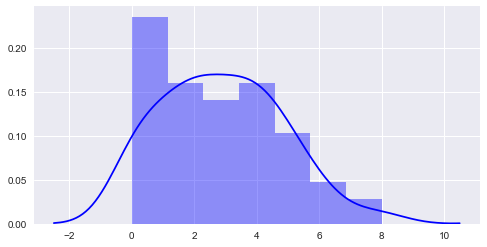

In [16]:
import seaborn as sns
from scipy import stats

sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(list(dict(drd87_day1_graph.network.degree()).values()), color="blue");

/anaconda3/envs/henlabenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



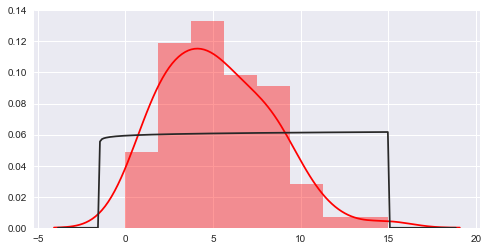

In [17]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(list(dict(drd87_day2_graph.network.degree()).values()), color="red", fit=stats.powerlaw);

/anaconda3/envs/henlabenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



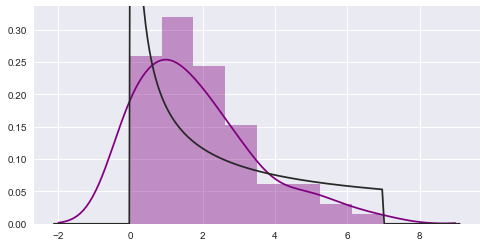

In [18]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(list(dict(drd87_day3_graph.network.degree()).values()), color="purple", fit=stats.powerlaw);